In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statistics as st
from datetime import datetime

# Rain
- '/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240717/SPRA/SPRA_loss_3.2771247695341255_ml_output_SPRA.parquet'
- '/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240717/SPRA/07_17_2024_13:23:01_full_SPRA.parquet'

# WIND
- '/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240709/SPRA/SPRA_loss_3.205824542045593_ml_output_SPRA.parquet'
- "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240709/SPRA/07_09_2024_17:31:55_full_SPRA.parquet"

In [83]:
model_path_xLSTM = "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240624/SPRA/SPRA_loss_0.3752268239855766_ml_output_SPRA.parquet"

model_path_s2s = "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240726/SPRA/SPRA_loss_5.934252487890648_ml_output_SPRA.parquet"

model_path_LSTM = "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240708/SPRA/SPRA_loss_1.1011306166648864_ml_output_SPRA.parquet"

In [84]:
xdf = pd.read_parquet(model_path_xLSTM)
xdf = xdf.sort_index()

sdf = pd.read_parquet(model_path_s2s)
sdf = sdf.sort_index()

ldf = pd.read_parquet(model_path_LSTM)
ldf = ldf.sort_index()

In [85]:
xdf.head()

,target_error_lead_0,Model forecast,diff
0,-1.069796,-0.111046,-0.958750
1,-0.812826,-0.111046,-0.701780
2,-0.778756,-0.111046,-0.667710
3,-0.991314,-0.111046,-0.880268
4,-1.003390,-0.111046,-0.892344


In [86]:
sdf["Model forecast"] = sdf["Model forecast"].shift((70)).fillna(0)
sdf["diff"] = sdf.iloc[:, 0] - sdf.iloc[:, 1]
sdf

,target_error_lead_0,Model forecast,diff
0,-0.228295,0.000000,-0.228295
1,-0.228295,0.000000,-0.228295
2,-0.228295,0.000000,-0.228295
3,-0.228295,0.000000,-0.228295
4,-0.228295,0.000000,-0.228295
...,...,...,...
48980,-0.228295,0.049590,-0.277885
48981,-0.228295,0.049684,-0.277980
48982,-0.228295,0.049671,-0.277966
48983,-0.228295,0.049449,-0.277744


In [87]:
ldf

,target_error_lead_0,Model forecast,diff
0,-1.070061,-0.278025,-0.792036
1,-0.812757,-0.283457,-0.529300
2,-0.778642,-0.284728,-0.493915
3,-0.991476,-0.283005,-0.708472
4,-1.003568,-0.296152,-0.707416
...,...,...,...
48980,-0.569900,-0.110484,-0.459417
48981,-0.470393,-0.157657,-0.312735
48982,-0.556893,-0.235966,-0.320928
48983,-0.485674,-0.293434,-0.192240


In [88]:
# rnn_path = "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/RNN/RAND_loss_0.037602543272078036_ml_output_RAND.parquet"
# rnn_df = pd.read_parquet(rnn_path)
# rnn_df = rnn_df.sort_index()

In [89]:
# rnn_df

In [90]:
full_df = pd.read_parquet(
    "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240726/SPRA/07_26_2024_18:31:36_full_SPRA.parquet"
)

In [91]:
for k in full_df.keys():
    print(k)

valid_time
valid_time_cos
valid_time_sin
target_error
t2m_SPRA
sh2_SPRA
d2m_SPRA
r2_SPRA
u10_SPRA
v10_SPRA
tp_SPRA
mslma_SPRA
tcc_SPRA
asnow_SPRA
cape_SPRA
dswrf_SPRA
dlwrf_SPRA
gh_SPRA
u_total_SPRA
u_dir_SPRA
new_tp_SPRA
lulc_cat_SPRA
elev_cat_SPRA
slope_cat_SPRA
t2m_JOHN
sh2_JOHN
d2m_JOHN
r2_JOHN
u10_JOHN
v10_JOHN
tp_JOHN
mslma_JOHN
tcc_JOHN
asnow_JOHN
cape_JOHN
dswrf_JOHN
dlwrf_JOHN
gh_JOHN
u_total_JOHN
u_dir_JOHN
new_tp_JOHN
lulc_cat_JOHN
elev_cat_JOHN
slope_cat_JOHN
t2m_COBL
sh2_COBL
d2m_COBL
r2_COBL
u10_COBL
v10_COBL
tp_COBL
mslma_COBL
tcc_COBL
asnow_COBL
cape_COBL
dswrf_COBL
dlwrf_COBL
gh_COBL
u_total_COBL
u_dir_COBL
new_tp_COBL
lulc_cat_COBL
elev_cat_COBL
slope_cat_COBL
lat_SPRA
lon_SPRA
elev_SPRA
tair_SPRA
ta9m_SPRA
td_SPRA
relh_SPRA
srad_SPRA
pres_SPRA
mslp_SPRA
wspd_sonic_mean_SPRA
wspd_sonic_SPRA
wmax_sonic_SPRA
wdir_sonic_SPRA
snow_depth_SPRA
precip_total_SPRA
lat_JOHN
lon_JOHN
elev_JOHN
tair_JOHN
ta9m_JOHN
td_JOHN
relh_JOHN
srad_JOHN
pres_JOHN
mslp_JOHN
wspd_sonic_mean_JO

In [92]:
ldf["valid_time"] = full_df["valid_time"]
sdf["valid_time"] = full_df["valid_time"]
xdf["valid_time"] = full_df["valid_time"]
# df['rnn_err'] = rnn_df['diff']

In [93]:
def which_fold(df, fold):
    length = len(df)
    test_len = int(length * 0.2)
    df_train = pd.DataFrame()

    for n in np.arange(0, 5):
        if n != fold:
            df1 = df.iloc[int(0.2 * n * length) : int(0.2 * (n + 1) * length)]
            df_train = pd.concat([df_train, df1])
        else:
            df_test = df.iloc[int(0.2 * n * length) : int(0.2 * (n + 1) * length)]

    return df_train["valid_time"], df_test["valid_time"]

In [94]:
station = "SPRA"

In [95]:
ldf["valid_time"] = pd.to_datetime(ldf["valid_time"])

In [96]:
ldf.dropna(inplace=True)

In [97]:
df_train, df_test = which_fold(ldf, 3)

In [98]:
df_test.iloc[0]

Timestamp('2021-09-18 20:00:00')

In [99]:
df_test.iloc[-1]

Timestamp('2022-11-13 13:00:00')

In [100]:
def date_filter(ldf, time1, time2):
    ldf = ldf[ldf["valid_time"] > time1]
    ldf = ldf[ldf["valid_time"] < time2]

    return ldf

## Time filter 

In [101]:
# time1 = datetime(2022, 1, 1, 0, 0, 0)
# time2 = datetime(2022, 4, 20, 23, 0, 0)

# ldf = date_filter(ldf, time1, time2)
# xdf = date_filter(xdf, time1, time2)
# sdf = date_filter(sdf, time1, time2)
# full_df = date_filter(full_df, time1, time2)

In [102]:
sdf.head()

,target_error_lead_0,Model forecast,diff,valid_time
0,-0.228295,0.0,-0.228295,2018-01-01 06:00:00
1,-0.228295,0.0,-0.228295,2018-01-01 07:00:00
2,-0.228295,0.0,-0.228295,2018-01-01 08:00:00
3,-0.228295,0.0,-0.228295,2018-01-01 09:00:00
4,-0.228295,0.0,-0.228295,2018-01-01 10:00:00


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def create_heatmap(df, x_column="target_error_lead_0", y_column="Model forecast"):
    df[x_column] = np.round(df[x_column] / 2.0) * 2.0
    df[y_column] = np.round(df[y_column] / 2.0) * 2.0
    # Pivot the DataFrame to create a matrix suitable for the heatmap
    heatmap_data = pd.pivot_table(
        df, index=y_column, columns=x_column, aggfunc="size", fill_value=0
    )

    # Create the heatmap using seaborn
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, vmax=1500, cmap="viridis", annot=True, fmt="d")

    # Set the labels and title
    plt.xlabel("Target")
    plt.ylabel("LSTM")
    plt.title("Heatmap of Target vs LSTM".format(y_column, x_column))

    # Show the heatmap
    plt.show()

In [104]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


def ml_output(df, df1, df2, full_df, avg, fold, station):
    fig, ax = plt.subplots(figsize=(24, 6))
    x = df1["valid_time"]

    # Convert datetime values to numerical values
    x_numeric = mdates.date2num(x)

    # Assuming your timestamps are in a datetime64 format
    day_mask = (x.dt.hour >= 6) & (
        x.dt.hour < 18
    )  # Adjust the hours based on your day/night definition

    plt.plot(
        np.array(x),
        np.array(df1["target_error_lead_0"]),
        c="black",
        linewidth=1,
        label="Target",
    )
    plt.plot(
        np.array(x),
        np.array(df1["Model forecast"]),
        c="g",
        linewidth=3,
        alpha=0.7,
        label="s2s",
    )
    # plt.plot(np.array(x), np.array(full_df["precip_total_SPRA"]), c="red", linewidth=3,alpha=0.7, label="SPRA")
    # plt.plot(np.array(x), np.array(df2["Model forecast"]), c="b", linewidth=3,alpha=0.7, label="xLSTM")
    # plt.plot(np.array(x), np.array(avg), c="orange", linewidth=3,alpha=0.7, label="Ensemble")
    # plt.plot(np.array(x), np.array(df["Model forecast"]), c="r",linewidth=3, alpha=0.7, label="LSTM Output")
    # plt.plot(x, df["rnn_err"], c="g", alpha=0.7, label="RNN Output")

    # plt.axvline(
    #     x=(int(0.2 * len(x)) * fold),
    #     c="green",
    #     linestyle="--",
    #     linewidth=2.0,
    #     label="Test Set Start",
    # )
    # plt.axvline(
    #     x=(int(0.2 * len(x)) * (fold + 1)),
    #     c="red",
    #     linestyle="--",
    #     linewidth=2.0,
    #     label="Test Set Finish",
    # )

    # Fill daytime hours with white color
    ax.fill_between(
        x_numeric, -4, 4.1, where=day_mask, color="white", alpha=0.5, label="Daytime"
    )

    # Fill nighttime hours with grey color
    ax.fill_between(
        x_numeric, -4, 4.1, where=~day_mask, color="grey", alpha=0.2, label="Nighttime"
    )

    ax.set_title(f"LSTM Output v Target: {station}: FH04", fontsize=28)
    # plt.ylim(-5, 5.)
    ax.legend()

    plt.show()


# Example usage
# ml_output(df, fold, station)

In [105]:
mean = st.mean(abs(sdf["diff"]))
mean

0.6229517809631273

In [106]:
avg = 12

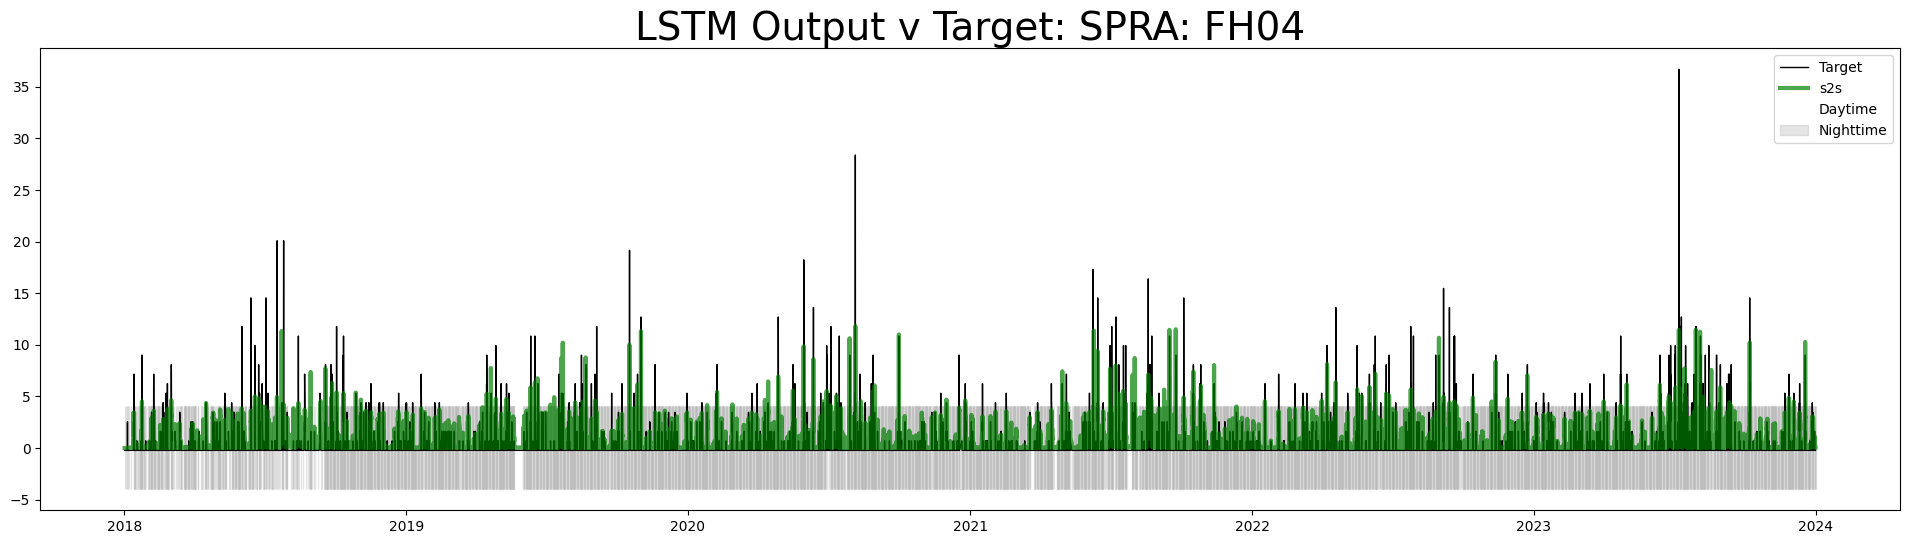

In [107]:
x = ml_output(ldf, sdf, xdf, full_df, avg, 4, station)

In [108]:
ldf.head()

,target_error_lead_0,Model forecast,diff,valid_time
0,-1.070061,-0.278025,-0.792036,2018-01-01 06:00:00
1,-0.812757,-0.283457,-0.529300,2018-01-01 07:00:00
2,-0.778642,-0.284728,-0.493915,2018-01-01 08:00:00
3,-0.991476,-0.283005,-0.708472,2018-01-01 09:00:00
4,-1.003568,-0.296152,-0.707416,2018-01-01 10:00:00


In [109]:
full_df["Abs_err"] = sdf["diff"]

In [110]:
for k in full_df.columns:
    if re.search(
        f"{station}|valid|Model forecast|Abs_err",
        k,
    ):
        continue
    else:
        full_df = full_df.drop(columns=[k])

In [111]:
# test_len = int(len(full_df['valid_time'])*0.2)
# full_df = full_df.iloc[0:test_len]

In [112]:
def groupby_month(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.month), (df.valid_time.dt.year)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(1, len(the_list) + 1)
    plt.bar(x, the_list)
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])
    ax.set_xticks(np.arange(1, len(the_list) + 1, int((len(the_list) + 1) / 6)))
    return the_list

In [113]:
full_df.head()

,valid_time,valid_time_cos,valid_time_sin,t2m_SPRA,sh2_SPRA,d2m_SPRA,r2_SPRA,u10_SPRA,v10_SPRA,tp_SPRA,...,srad_SPRA,pres_SPRA,mslp_SPRA,wspd_sonic_mean_SPRA,wspd_sonic_SPRA,wmax_sonic_SPRA,wdir_sonic_SPRA,snow_depth_SPRA,precip_total_SPRA,Abs_err
0,2018-01-01 06:00:00,0.999853,0.017166,-22.144995,0.00040,-27.480002,60.500000,4.680628,0.288429,0.0,...,0.053039,1002.453003,1006.029541,1.845265,2.662534,4.423311,277.968811,0.044888,0.0,-0.228295
1,2018-01-01 07:00:00,0.999853,0.017166,-22.384985,0.00042,-26.949683,64.900002,4.413494,0.568998,0.0,...,0.125970,1002.713989,1006.373108,1.386617,1.518970,2.357420,276.603607,0.043923,0.0,-0.228295
2,2018-01-01 08:00:00,0.999853,0.017166,-22.421271,0.00041,-27.318533,63.000000,4.146494,0.479216,0.0,...,0.112717,1002.739990,1006.410461,2.575588,2.169021,3.548372,277.717590,0.045283,0.0,-0.228295
3,2018-01-01 09:00:00,0.999853,0.017166,-22.729544,0.00040,-27.650275,62.799999,4.204945,0.494606,0.0,...,0.112720,1002.533020,1006.190369,2.555136,2.813356,4.330536,276.307190,0.045839,0.0,-0.228295
4,2018-01-01 10:00:00,0.999853,0.017166,-23.103598,0.00041,-27.331671,66.599998,4.116848,0.412491,0.0,...,0.086197,1002.583984,1006.279968,2.945392,2.815591,3.975218,275.334595,0.045290,0.0,-0.228295


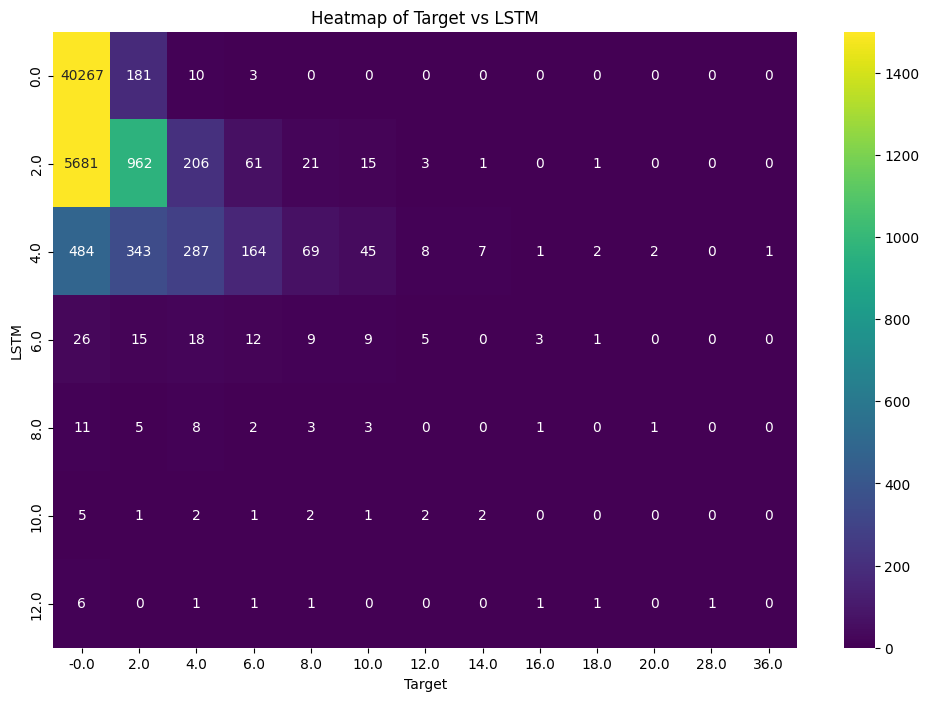

In [114]:
create_heatmap(sdf)

/tmp/tmp.xGfXAklRad/ipykernel_2109025/2351311710.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])


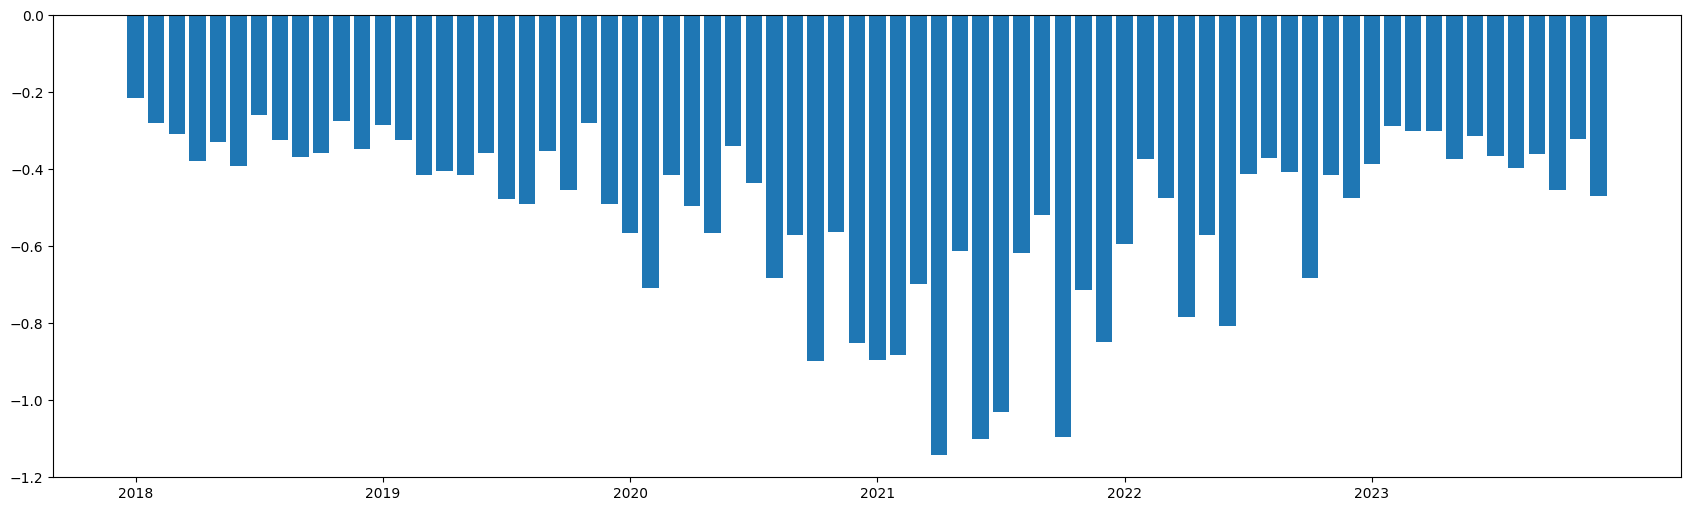

In [115]:
err_by_month = groupby_month(full_df, "Abs_err")

In [116]:
def groupby_time(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.hour)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(0, len(the_list))
    plt.bar(x, the_list, color="g")
    return the_list

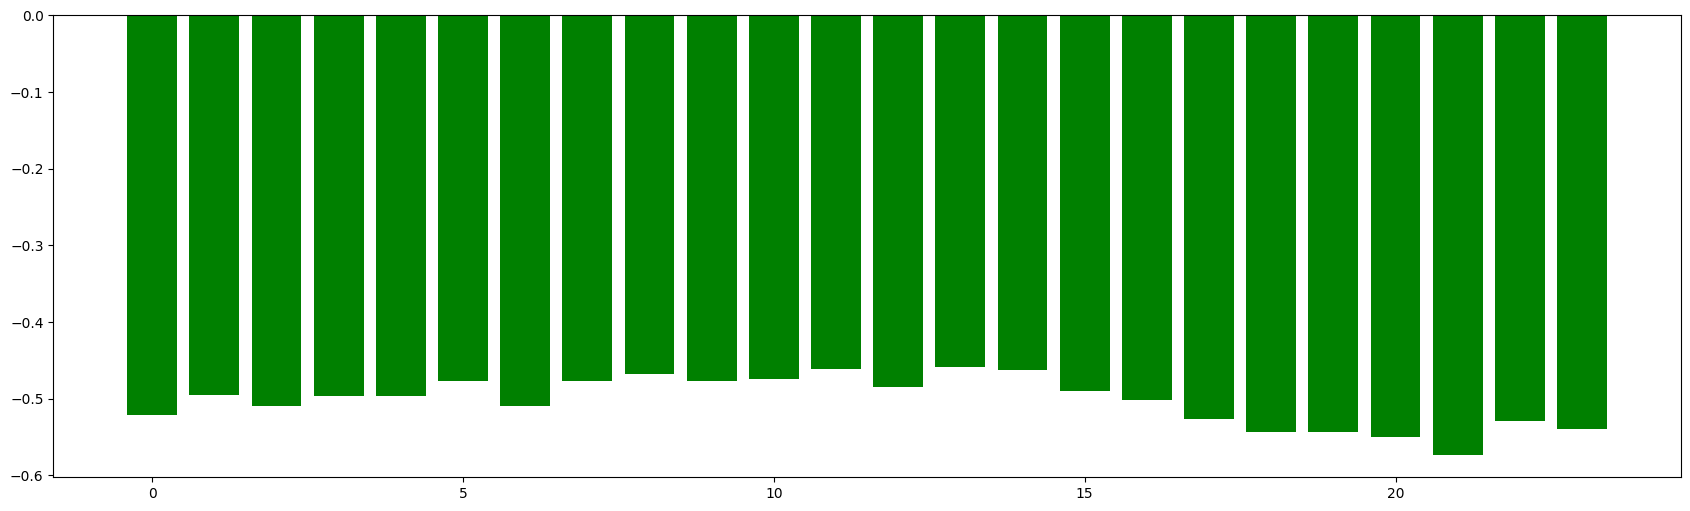

In [117]:
err_by_time = groupby_time(full_df, "Abs_err")

In [118]:
import calendar


def groupby_month_total(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.month)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(0, len(the_list))

    # Get a colormap
    cmap = plt.get_cmap("RdBu")
    # Normalize your data to map to the colormap
    norm = plt.Normalize(min(the_list), max(the_list))
    colors = cmap(norm(the_list))

    # Create a bar chart
    plt.bar(x, the_list, color=colors)
    ax.set_xticks(x)  # Set x-ticks to be at the positions of the months
    month_labels = [calendar.month_name[month] for month in GB.index]
    ax.set_xticklabels(month_labels)  # Label x-ticks with month numbers

    plt.show()
    return the_list

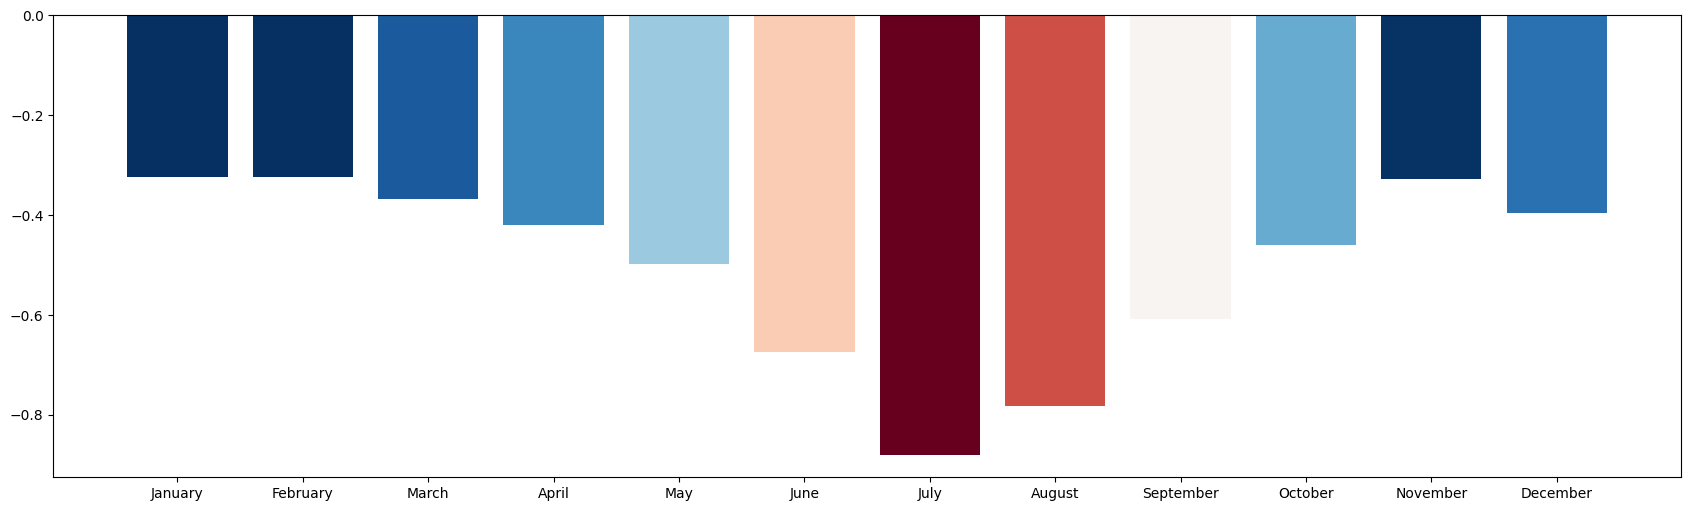

[-0.323599970730976,
 -0.3242168036479301,
 -0.36829288481770567,
 -0.42047155959411964,
 -0.49864294285596417,
 -0.6739320828956352,
 -0.8811156058785202,
 -0.7821177453185159,
 -0.6079685951537682,
 -0.4610066872270672,
 -0.32695629293846507,
 -0.39534248926728577]

In [119]:
groupby_month_total(full_df, "Abs_err")

In [120]:
def myround(x, base):
    return base * round(x / base)

In [121]:
# function to get unique values
def unique(list1):
    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [122]:
def err_bucket(full_df, met_col, rounded_base):
    temps = []
    for i, _ in enumerate(full_df[met_col]):
        rounded = myround(full_df[met_col].iloc[i], rounded_base)
        temps.append(rounded)

    unique_temps = unique(temps)

    zeros = np.zeros(len(unique_temps))
    rs = np.resize(zeros, (len(unique_temps), len(unique_temps)))

    temp_df = pd.DataFrame(
        data=rs, index=[np.arange(len(unique_temps))], columns=sorted(unique_temps)
    )

    for i, _ in enumerate(full_df[met_col]):
        rounded = myround(full_df[met_col].iloc[i], rounded_base)
        err = full_df["Abs_err"].iloc[i]
        temp_df[rounded].iloc[0] = abs(err) + abs(temp_df[rounded].iloc[0])
        temp_df[rounded].iloc[-1] += 1

    instances = temp_df.iloc[-1]
    temp_df = temp_df.iloc[0]

    return temp_df, instances

In [123]:
def plot_buckets(temp_df, instances, var_name, cmap, width):
    my_cmap = plt.get_cmap(cmap)
    averages = temp_df / instances
    y = averages
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
    the_list = averages.tolist()
    fig, ax = plt.subplots(
        figsize=(21, 6), facecolor="slategrey", constrained_layout=True
    )
    bars = plt.bar(temp_df.keys(), the_list, color=my_cmap(rescale(y)), width=width)
    ax.set_title("Absolute Error of LSTM", fontsize=28, c="white")
    ax.set_xlabel(var_name, fontsize=18, c="white")
    ax.set_ylabel("Mean Absolute Error", fontsize=18, c="white")
    # Iterating over the bars one-by-one
    # Annotate each bar with its value
    # Annotate each bar with the number of instances
    for bar, value, instance_count in zip(bars, the_list, instances):
        yval = value + 0.01  # Adjust the vertical position of the label
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f"n={instance_count}",
            ha="center",
            va="bottom",
            color="black",
            fontsize=12,
            rotation=90,
        )

In [124]:
# for k in full_df.keys():
#     print(k)

In [125]:
# diector = sorted(os.listdir('/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231129/'))

# for d in diector:
#         full_df = pd.read_parquet(
#         f"/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231129/{d}"
#     )
#         for k in full_df.columns:
#             if re.search(
#                 f"{station}",
#                 k,
#             ):
#                 print("Succes!!")
#                 print(d)
#             else:
#                 continue

In [126]:
temp_df, instances = err_bucket(full_df, f"tair_{station}", 2)

KeyboardInterrupt: 

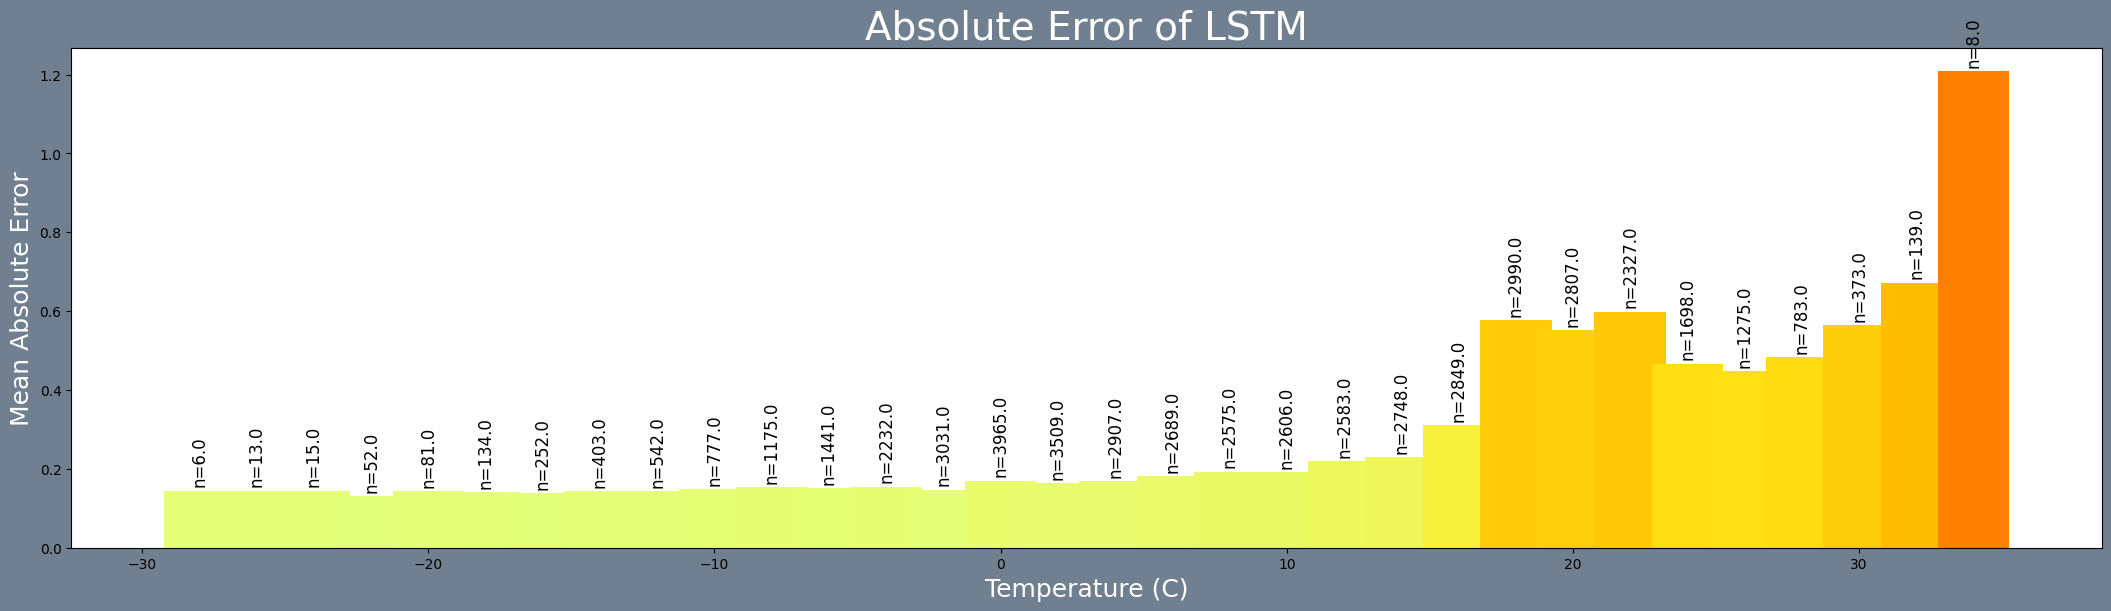

In [ ]:
plot_buckets(temp_df, instances, "Temperature (C)", "Wistia", 2.5)

In [ ]:
relh_df, instances = err_bucket(full_df, f"relh_{station}", 2)

KeyboardInterrupt: 

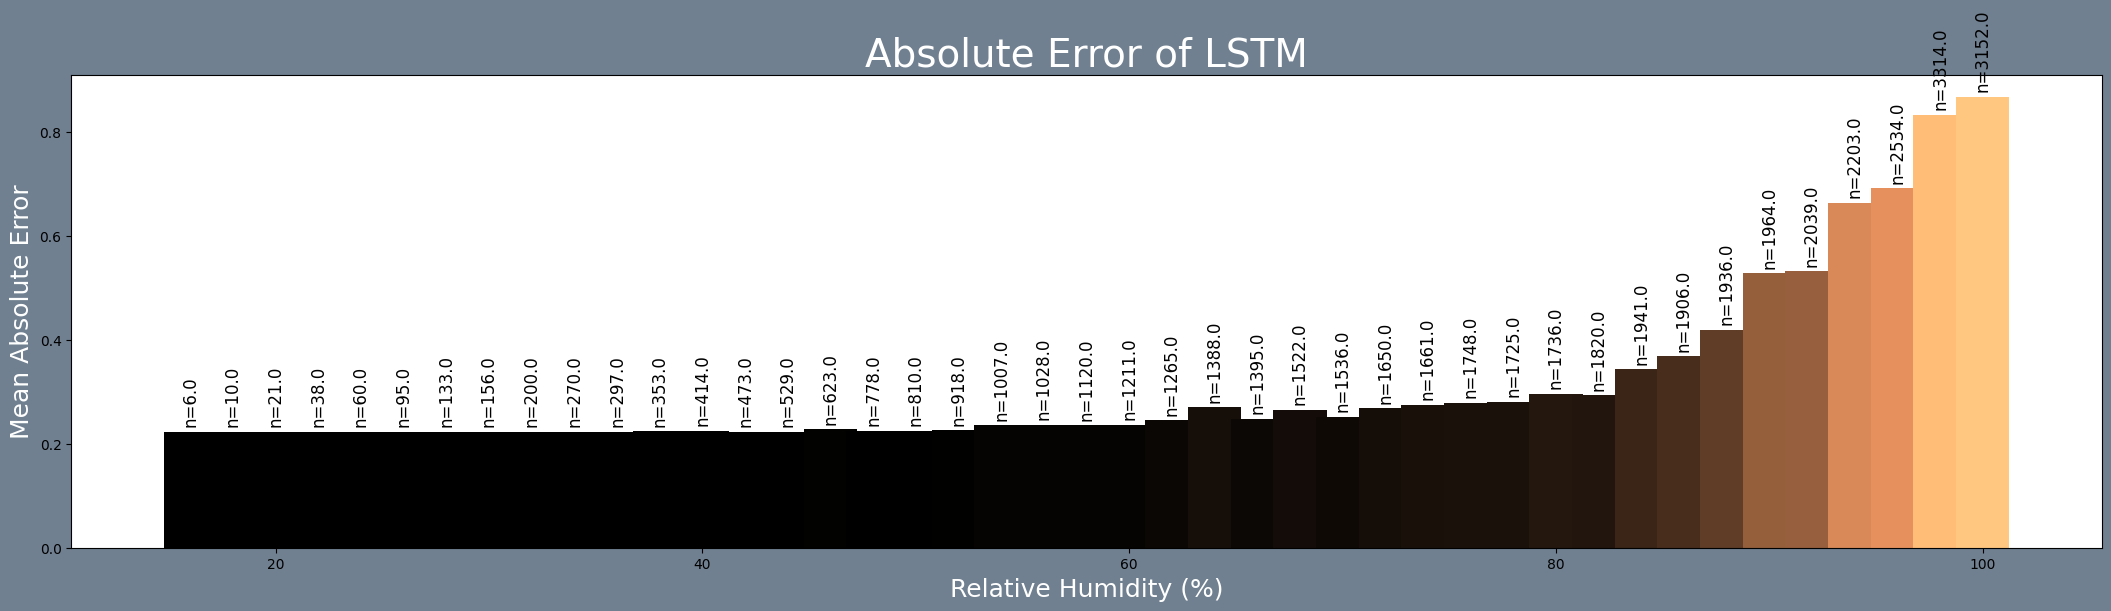

In [ ]:
plot_buckets(relh_df, instances, "Relative Humidity (%)", "copper", 2.5)

In [ ]:
new_df, instances = err_bucket(full_df, f"srad_{station}", 40)

KeyboardInterrupt: 

In [ ]:
plot_buckets(new_df, instances, "Solar Radiation (W / m*m)", "copper", 50.0)

In [ ]:
pres_df, instances = err_bucket(full_df, f"pres_{station}", 2)

In [ ]:
print(f'The mean pressure at {station} is {full_df[f"pres_{station}"].mean()}')

In [ ]:
plot_buckets(pres_df, instances, "Surface Pressure (mb)", "copper", 1.5)

In [ ]:
def round_small(full_df, met_col, rounded_base):
    temps = []
    for i, _ in enumerate(full_df[met_col]):
        if full_df[met_col].iloc[i] < 1.0 and full_df[met_col].iloc[i] >= 0:
            rounded = round(full_df[met_col].iloc[i], rounded_base)
            temps.append(rounded)
        else:
            rounded = myround(full_df[met_col].iloc[i], 1)
            temps.append(rounded)

    unique_temps = unique(temps)

    zeros = np.zeros(len(unique_temps))
    rs = np.resize(zeros, (len(unique_temps), len(unique_temps)))
    temp_df = pd.DataFrame(
        data=rs, index=[np.arange(len(unique_temps))], columns=sorted(unique_temps)
    )

    for i, _ in enumerate(full_df[met_col]):
        if full_df[met_col].iloc[i] < 1.0 and full_df[met_col].iloc[i] >= 0:
            rounded = round(full_df[met_col].iloc[i], rounded_base)
        else:
            rounded = float(myround(full_df[met_col].iloc[i], base=1))
        err = float(full_df["Abs_err"].iloc[i])
        temp_df[rounded].iloc[0] = abs(err) + abs(temp_df[rounded].iloc[0])
        temp_df[rounded].iloc[-1] += 1

    instances = temp_df.iloc[-1]
    temp_df = temp_df.iloc[0]
    temp_df = temp_df.loc[~(temp_df == 0)]
    instances = instances.loc[~(instances == 0)]
    return temp_df, instances

In [ ]:
rain_df, instances = err_bucket(full_df, f"precip_total_{station}", 2)

KeyboardInterrupt: 

In [ ]:
plot_buckets(rain_df, instances, "Precipitation [mm/hr]", "winter", 1.0)

In [ ]:
snow_df, instances = round_small(full_df, f"snow_depth_{station}", 2)

In [ ]:
snow_df = snow_df.iloc[1:]
instances = instances.iloc[1:]

In [ ]:
plot_buckets(snow_df, instances, "Accumulated Snow (m)", "cool", 0.01)

In [ ]:
wmax, instances = err_bucket(full_df, f"wmax_sonic_{station}", 2)

In [ ]:
plot_buckets(wmax, instances, "Wind Max (m/s)", "copper", 1.0)

In [ ]:
wdir, instances = err_bucket(full_df, f"wdir_sonic_{station}", 45)

In [ ]:
plot_buckets(wdir, instances, "Wind Dir (degrees)", "copper", 10.0)